In [77]:
import numpy as np
x = np.array([80, 65, 95, 95, 85, 75, 90, 65])  # Attendance
x2 = np.array([75, 70, 85, 100, 65, 55, 90, 80]) # Homework
y = np.array([1, 0, 1, 1, 0 , 0, 1, 1]) # Pass


# Separamos los conjuntos por prueba y entrenamiento
x_1 = x[:6]
x_1v = x[-2:]
x2_1 = x2[:6]
x2_v = x2[-2:]
y_t = y[:6]
y_v = y[-2:]

## Algoritmo de regresión logística con columna Attendance



Para la inicialización de nuestros valores $\theta$, nos basamos en la inicialización de Xavier-Glorot : https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal

In [78]:
import tensorflow as tf
tf.random.set_seed(24)
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2, 1))
n = x_1.size

## Crearemos un grid search para encontrar el $\alpha$ óptimo dentro de un rango.

In [79]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))
        delta = h_0 - y_t
        delta_x1 = delta * x_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x1)


        costo = np.mean((h_0 - y_t) ** 2)   # Calculamos costo con MSE
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-79-f0f734002dca>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))


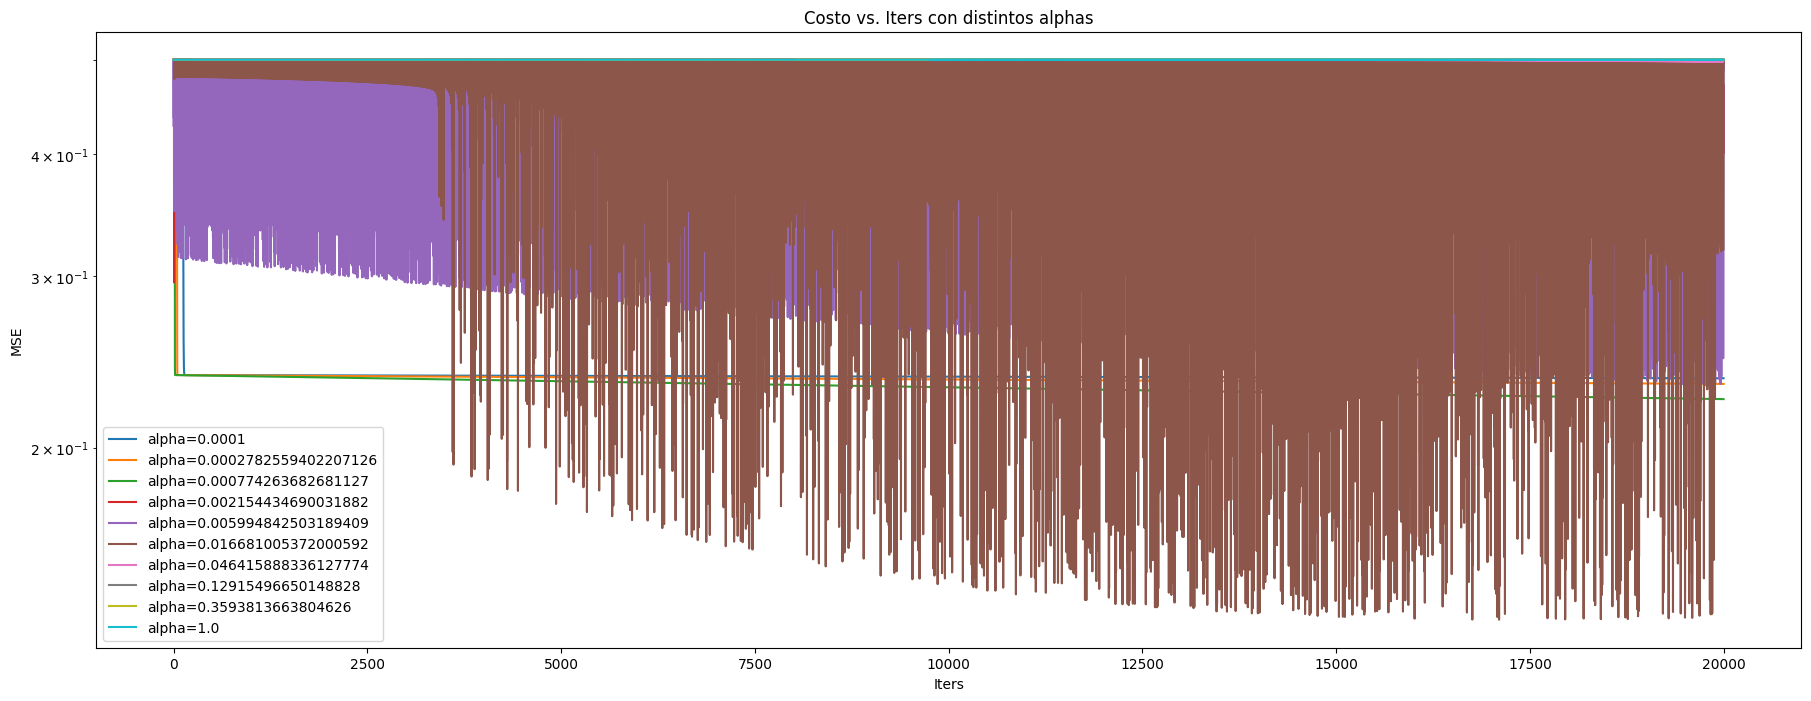

Learning Rate: 0.0001
  Costo Final: 0.235728
  theta_0: -0.567574, theta_1: 0.008943

Learning Rate: 0.0003
  Costo Final: 0.232604
  theta_0: -0.717516, theta_1: 0.010732

Learning Rate: 0.0008
  Costo Final: 0.224401
  theta_0: -1.123385, theta_1: 0.015577

Learning Rate: 0.0022
  Costo Final: 0.401319
  theta_0: -2.428242, theta_1: 0.081532

Learning Rate: 0.0060
  Costo Final: 0.499998
  theta_0: -5.827451, theta_1: 0.054428

Learning Rate: 0.0167
  Costo Final: 0.500000
  theta_0: -14.867152, theta_1: 0.744374

Learning Rate: 0.0464
  Costo Final: 0.500000
  theta_0: -42.668919, theta_1: 0.386173

Learning Rate: 0.1292
  Costo Final: 0.500000
  theta_0: -117.867876, theta_1: 1.924886

Learning Rate: 0.3594
  Costo Final: 0.500000
  theta_0: -327.120706, theta_1: 5.144160

Learning Rate: 1.0000
  Costo Final: 0.500000
  theta_0: -909.379149, theta_1: 14.101982



In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('MSE')
plt.legend()
plt.yscale('log')

plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 0.0167$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 0.0167.$

In [81]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [82]:
# Extraemos solo los de alpha = 0.0167
theta_0 = x_theta_0[5]
theta_1 = x_theta_1[5]
print(theta_0, theta_1)

-14.86715247594826 0.7443741046620592


In [83]:
y_pred = []
for i in range(0, len(x_1v)):
  y_pred.append(round(1/(1 + np.exp(-(theta_0 + theta_1*x_1v[i])))))

In [84]:
y_pred

[1, 1]

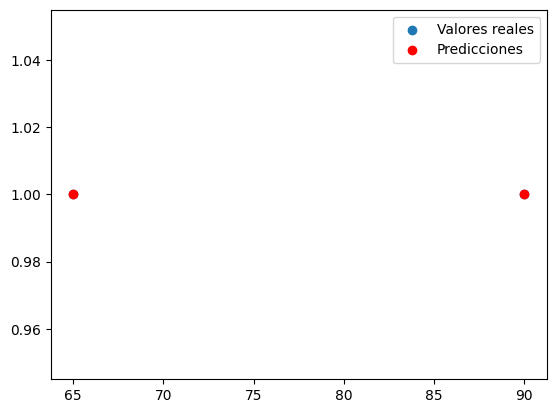

In [85]:
import matplotlib.pyplot as plt
plt.scatter(x_1v, y_v)
plt.scatter(x_1v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [86]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1

Accuracy = (true_pos + true_neg) / len(y_v)

if (true_pos + false_pos) == 0:
    Precision = 0
else:
    Precision = true_pos / (true_pos + false_pos)

if (true_pos + false_neg) == 0:
    Recall = 0
else:
    Recall = true_pos / (true_pos + false_neg)
if (Precision + Recall) == 0:
    F_1 = 0
else:
    F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0


# Algoritmo de regresión logística con columna Homework

Se hará exactamente lo mismo que anteriormente, pero ahora con la columna Homework

In [87]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))
        delta = h_0 - y_t
        delta_x2 = delta * x2_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x2)


        costo = np.mean((h_0 - y_t) ** 2)   # Calculamos costo con MSE
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-87-ce27e66dd30f>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))


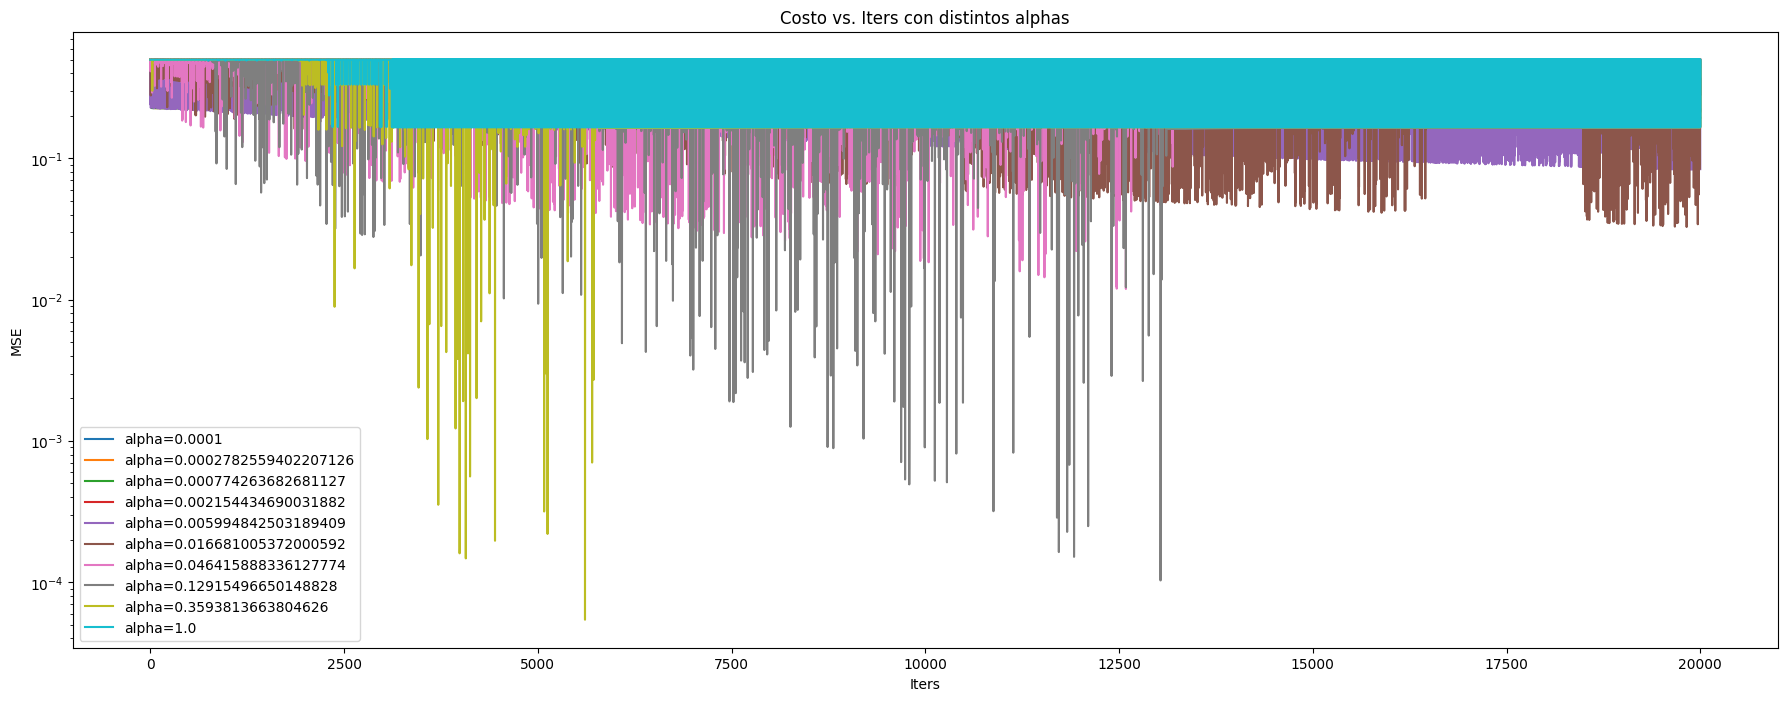

Learning Rate: 0.0001
  Costo Final: 0.222361
  theta_0: -0.622314, theta_1: 0.012066

Learning Rate: 0.0003
  Costo Final: 0.214214
  theta_0: -0.866806, theta_1: 0.015229

Learning Rate: 0.0008
  Costo Final: 0.194199
  theta_0: -1.509403, theta_1: 0.023567

Learning Rate: 0.0022
  Costo Final: 0.369192
  theta_0: -3.554330, theta_1: 0.029384

Learning Rate: 0.0060
  Costo Final: 0.084029
  theta_0: -8.551582, theta_1: 0.128350

Learning Rate: 0.0167
  Costo Final: 0.500000
  theta_0: -23.738395, theta_1: 0.266830

Learning Rate: 0.0464
  Costo Final: 0.500000
  theta_0: -66.532692, theta_1: 1.147976

Learning Rate: 0.1292
  Costo Final: 0.500000
  theta_0: -172.643426, theta_1: 2.557258

Learning Rate: 0.3594
  Costo Final: 0.166599
  theta_0: -440.790174, theta_1: 2.225605

Learning Rate: 1.0000
  Costo Final: 0.500000
  theta_0: -1178.740020, theta_1: 48.634338



In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('MSE')
plt.legend()
plt.yscale('log')

# Mostraremos este rango, pues es donde hubo realmente cambios significativos
plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 1$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 1.$

In [89]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [90]:
# Extraemos solo los de alpha = 1
theta_0 = x_theta_0[-1]
theta_1 = x_theta_1[-1]
print(theta_0, theta_1)

-1178.7400198177247 48.634338242407


In [91]:
y_pred = []
for i in range(0, len(x_1v)):
  y_pred.append(round(1/(1 + np.exp(-(theta_0 + theta_1*x_1v[i])))))

In [92]:
y_pred

[1, 1]

In [93]:
len(y_v)

2

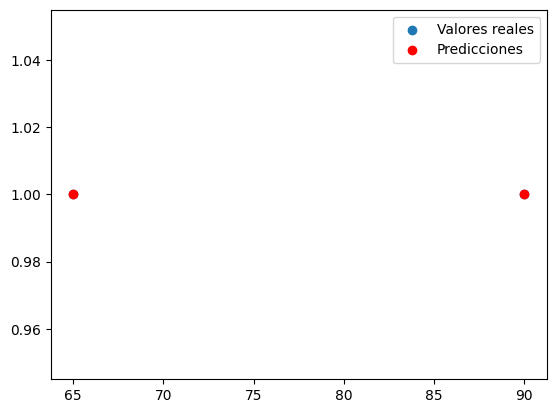

In [94]:
import matplotlib.pyplot as plt
plt.scatter(x_1v, y_v)
plt.scatter(x_1v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [95]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1


Accuracy = (true_pos + true_neg )/ len(y_v)
Precision = (true_pos)/ (true_pos + false_pos)
Recall = (true_pos)/ (true_pos + false_neg)
F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0


In [98]:
!jupyter nbconvert Log_regression.ipynb --to html

[NbConvertApp] WARNING | pattern 'Log_regression.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
